Q1 - Generate two sets of 10 dimensional (10 attribute data), one for each class. You can use any
covariance matrix you would like, however, the matrix should contain covariance between at
least 3 of the attributes. Similarly, you can use any class means you would like. However, you
must be sure that when using a linear classifier (as we will do herein), you will have some errors
when classifying the training data (i.e. ensure that the distance between the means is small enough AND the variance is large enough so that the classes overlap somewhat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.discriminant_analysis

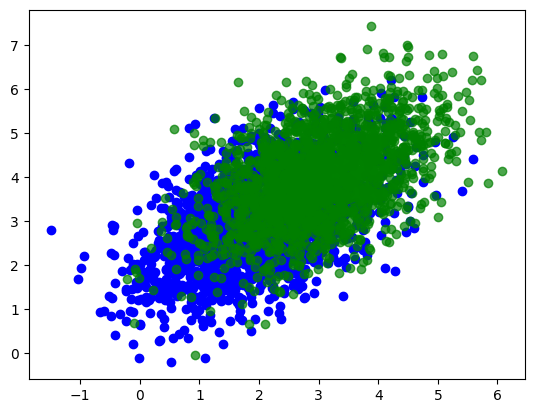

In [ ]:
class_mean_1 = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
class_mean_2 = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define covariance matrix
cov_matrix = np.array([
    [1, 0.5, 0, 0, 0.5, 0, 0, 0, 0, 0],
    [0.5, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0.5, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.5, 1, 0, 0, 0, 0, 0, 0],
    [0.5, 0, 0, 0, 1, 0.5, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.5, 1, 0.5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.5, 1, 0.5, 0, 0],
    [0, 0, 0, 0, 0, 0, 0.5, 1, 0.5, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.5, 1, 0.5],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 1]
])

x1 = np.random.multivariate_normal(class_mean_1,cov_matrix,2000)
x2 = np.random.multivariate_normal(class_mean_2,cov_matrix, 2000)
X = np.concatenate((x1,x2))

Xc = np.zeros(2000)
Xc = np.concatenate((Xc, np.ones(2000)))

plt.scatter(x1[:,0], x1[:,1],c='b')
plt.scatter(x2[:,0], x2[:,1],c='g',alpha=0.7)

2. Take the ENTIRE dataset (both classes) and use PCA to represent the data in score space. With
the PCA representation, do the following:
a. Reduce the dimensionality to 10, 9, 8, 7, 6 and 5 by incrementally removing the
direction in the data corresponding to the smallest variance and, from the resulting
scores, reconstruct the original 10-dimensional data (in other words, apply the PCA
formula backwards). Determine the mean square error between the reconstructed
dataset and the original data and plot the result for 10, 9, 8, 7, 6 and 5 retained
dimensions.

b. Follow the same dimensionality reduction procedure as part (a) except classify all of the
data in the dataset using the PCA scores with FLD and determine the classification error
instead of determining the reconstruction MSE. Plot the classification error result (total for both classes) for the 10, 9, 8, 7, 6 and 5 retained dimensions.

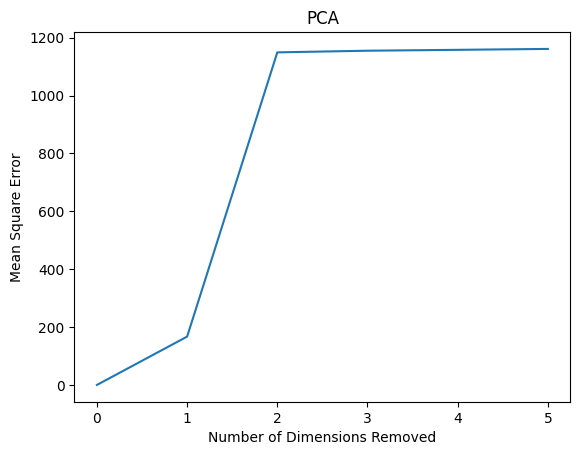

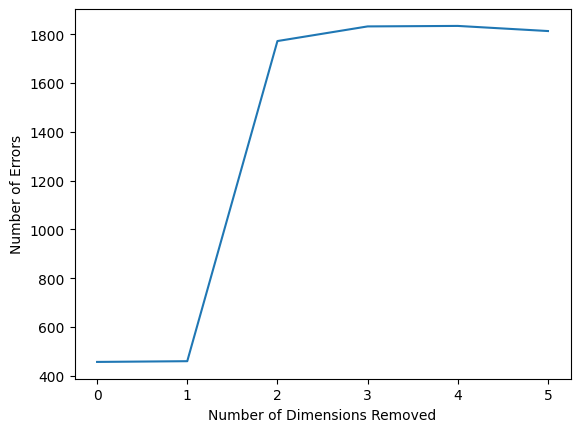

In [ ]:
# PCA
Xmc = X - np.mean(X)
D,E = np.linalg.eig(np.dot(Xmc.T,Xmc))

sortIndex = np.argsort(D)

ESorted =np.zeros((10,10))
index = 0
for i in range(0,10):
    ESorted[:,index] = E[:,sortIndex[i]]
    index = index + 1

meanSquareError = np.zeros(10,)
classificationError = np.zeros(10,)
ySorted = np.dot(X,ESorted)
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
for numDims in range(5,11):

    # reconstruction
    yReduced = ySorted[:,0:numDims]
    EReduced = ESorted[:,0:numDims]
    XReconstructed = np.dot(yReduced, np.transpose(EReduced))
    meanSquareError[10 - numDims] = sum(sum((XReconstructed - X)**2))/2000

#train the LDA model
    lda.fit(yReduced,Xc)
#test the LDA model
    prediction = lda.predict(yReduced)
    classificationError[10 - numDims] = sum(prediction != Xc)

n = np.linspace(0,5,6)
plt.plot(n,meanSquareError[0:6])
plt.title("PCA")
plt.xlabel("Number of Dimensions Removed")
plt.ylabel("Mean Square Error")
plt.show()

plt.plot(n,classificationError[0:6])
plt.xlabel("Number of Dimensions Removed")
plt.ylabel("Number of Errors")
plt.show()

Q3 - Reduce the dimensionality of the original dataset using a backward search to 10, 9, 8, 7, 6 and 5
(by minimizing the error) and classify all of the data in the dataset using the reduced
dimensional data with FLD. Plot the classification error result (total for both classes) for the 10,
9, 8, 7, 6 and 5 retained dimensions.

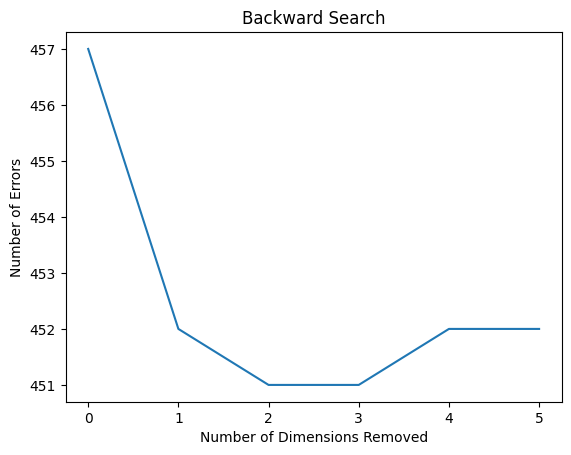

In [ ]:
#use backward search -  FEATURE SELECTION to remove columns
#so that the remaining provide the least error

minError = 1000000*np.ones(6,)
# use LDA with all cols
lda.fit(ySorted,Xc)
#test
prediction = lda.predict(ySorted)
minError[0] = sum(prediction != Xc)

#find the column to remove that provides the lowest error
minErrorColumn = 0
ySelected = ySorted
numCols = 10
for iteration in range(1,6):
    for column in range(numCols):
        yReduced = np.delete(ySelected,column,1)
        #train
        lda.fit(yReduced,Xc)
        #testing
        prediction = lda.predict(yReduced)
        classificationError = sum(prediction != Xc)
        if classificationError < minError[iteration]:
            minError[iteration] = classificationError
            minErrorColumn = column

    numCols = numCols - 1
    ySelected = np.delete(ySelected,minErrorColumn,1)


plt.plot(n,minError[0:6])
plt.title("Backward Search")
plt.xlabel("Number of Dimensions Removed")
plt.ylabel("Number of Errors")
plt.show()

4. Qualitatively compare the results of part 2b and part 3 and comment on any differences

**For the PCA model - the error is least with one dimension removed**


**For Feature selection - the error is least with 2 dimensions removed**

For feature selection the error is quite less as more dimensions are removed but in PCA the error remains high with more dimensions removed
